In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
# f(x) = a(b(c(d(x))))
# function = [d, c, b, a]
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt

In [3]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
_ = tf.compat.v1.Session(config=config)


Device mapping: no known devices.


### Load the encoded protein sequences, labels and masks

In [4]:
# The masks are not needed for the FFN or CNN models
train = np.load('data/reduced_train.npz')
X_train = train['X_train']
y_train = train['y_train']
mask_train = train['mask_train']
print(X_train.shape)
print(X_train)

validation = np.load('data/reduced_val.npz')
X_val = validation['X_val']
y_val = validation['y_val']
mask_val = validation['mask_val']
print(X_val.shape)

(2423, 400, 20)
[[[0.   0.   0.   ... 0.   0.   0.  ]
  [1.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.48 0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.   0.   0.   ... 0.   0.   0.  ]
  [1.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 ...

 [[0.   0.   0.   ... 0.   0.   0.22]
  [0.   0.17 0.   ... 0.   0.   0.  ]
  [0.   0.04 0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.   0.   0.   ... 0.   0.   0.

### Building the network by defining the network architecture.

In [5]:
# We have an input layer, dense layer and output layer.

# Set the hyperparameters of the network:
batch_size = 128
seq_len = 400
n_feat = 20
n_hid = 30
n_class = 10
lr = 0.0025
drop_prob = 0.5

# Dummy data to check the size of the layers during the building of the network
X = np.random.randint(0, 10, size=(batch_size, seq_len, n_feat))
# print("x: {}".format(X))

In [6]:
# Define the layers of the network
input_shape = (seq_len, n_feat)
model = Sequential()
# Input layer, holds the shape of the data, flattening the input
model.add(Flatten(input_shape=input_shape))
# # Dense layer with ReLu activation function
model.add(Dense(units=n_hid, activation='relu'))
model.add(Dropout(drop_prob))
# Output layer with a Softmax activation function
model.add(Dense(units=n_class, activation='softmax'))

# Calculate the prediction and network loss for the training set and update the network weights:

# todo c'è qualcosa che manca forse qui, ovvero:
# Training loss
# loss = T.mean(t_loss)
# Parameters
# params = lasagne.layers.get_all_params([l_out], trainable=True)
# Get the network gradients and perform total norm constraint normalization
# all_grads = lasagne.updates.total_norm_constraint(T.grad(loss, params),3)
# total_norm_constraint() constrain the total norm of a list of tensors e questo non viene fatto.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8000)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                240030    
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 240,340
Trainable params: 240,340
Non-trainable params: 0
_________________________________________________________________
None


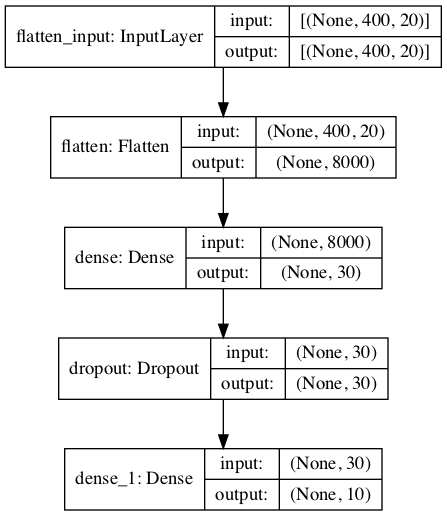

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

print(model.summary())
plot_model(model, "model.png", show_shapes=True)

### Train


In [9]:
y_train = to_categorical(y_train, n_class)
y_val = to_categorical(y_val, n_class)

# Number of epochs
num_epochs = 80

# Calculate also the prediction and network loss for the validation set:
history = model.fit(X_train, y_train, epochs=80, batch_size=batch_size, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/80
19/19 [==============================] - 1s 53ms/step - loss: 2.1180 - accuracy: 0.2359 - val_loss: 1.6822 - val_accuracy: 0.5181
Epoch 2/80
19/19 [==============================] - 0s 5ms/step - loss: 1.5802 - accuracy: 0.4526 - val_loss: 1.3703 - val_accuracy: 0.5764
Epoch 3/80
19/19 [==============================] - 0s 5ms/step - loss: 1.2656 - accuracy: 0.5823 - val_loss: 1.1832 - val_accuracy: 0.6724
Epoch 4/80
19/19 [==============================] - 0s 5ms/step - loss: 1.0172 - accuracy: 0.6756 - val_loss: 1.0430 - val_accuracy: 0.6898
Epoch 5/80
19/19 [==============================] - 0s 5ms/step - loss: 0.8429 - accuracy: 0.7334 - val_loss: 0.9641 - val_accuracy:

### Model loss and accuracy

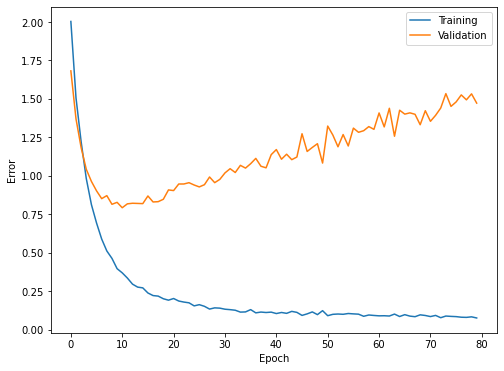

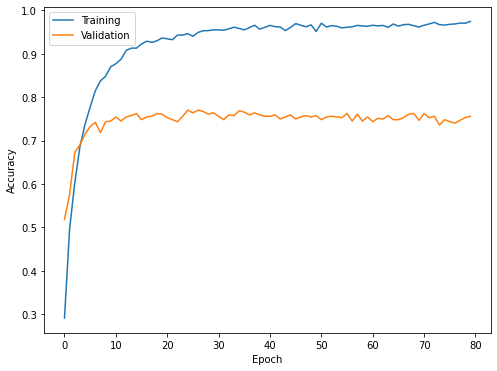

In [10]:
# Plots of loss and accuracy for training and validation set at each epoch
x_axis = range(num_epochs)
plt.figure(figsize=(8, 6))
# loss_training:
plt.plot(x_axis, history.history['loss'])
# loss_validation
plt.plot(x_axis, history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(('Training', 'Validation'))
plt.show()

plt.figure(figsize=(8, 6))
# accuracy training
plt.plot(x_axis, history.history['accuracy'])
# accuracy validation
plt.plot(x_axis, history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training', 'Validation'))
plt.show()

### Confusion matrix
The confusion matrix shows how well is predicted each class and which are the most common mis-classifications.
Code based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
